# WorkFlow

## Classes

## Load the data

## Test Modelling

## Modelling

**<hr>**

## Classes

In [1]:
import os
import cv2
import torch
import numpy as np

In [2]:
def load_data(img_size=112):
    data = []
    index = -1
    labels = {}
    for directory in os.listdir('./data/'):
        index += 1
        labels[f'./data/{directory}/'] = [index,-1]
    print(len(labels))
    for label in labels:
        for file in os.listdir(label):
            filepath = label + file
            img = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(img_size,img_size))
            img = img / 255.0
            data.append([
                np.array(img),
                labels[label][0]
            ])
            labels[label][1] += 1
    for _ in range(12):
        np.random.shuffle(data)
    print(len(data))
    np.save('./data.npy',data)
    return data

In [3]:
import torch

In [4]:
def other_loading_data_proccess(data):
    X = []
    y = []
    print('going through the data..')
    for d in data:
        X.append(d[0])
        y.append(d[1])
    print('splitting the data')
    VAL_SPLIT = 0.25
    VAL_SPLIT = len(X)*VAL_SPLIT
    VAL_SPLIT = int(VAL_SPLIT)
    X_train = X[:-VAL_SPLIT]
    y_train = y[:-VAL_SPLIT]
    X_test = X[-VAL_SPLIT:]
    y_test = y[-VAL_SPLIT:]
    print('turning data to tensors')
    X_train = torch.from_numpy(np.array(X_train))
    y_train = torch.from_numpy(np.array(y_train))
    X_test = torch.from_numpy(np.array(X_test))
    y_test = torch.from_numpy(np.array(y_test))
    return [X_train,X_test,y_train,y_test]

**<hr>**

## Load the data

In [5]:
REBUILD_DATA = True
if REBUILD_DATA:
    data = load_data()
    np.random.shuffle(data)
    X_train,X_test,y_train,y_test = other_loading_data_proccess(data)

36
2515


/home/indika/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


going through the data..
splitting the data
turning data to tensors


## Test Modelling

In [6]:
import torch
import torch.nn as nn

In [7]:
import torch.nn.functional as F

In [8]:
# class Test_Model(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(1, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 25 * 25, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 36)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 25 * 25)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [9]:
class Test_Model(nn.Module):
    def __init__(self,output:int=36):
        super().__init__()
        self.conv1 = nn.Conv2d(1,4,5)
        self.conv2 = nn.Conv2d(4,8,5)
        self.conv3 = nn.Conv2d(8,16,5)
        self.conv4 = nn.Conv2d(16,32,5)
        self.conv5 = nn.Conv2d(32,64,5)
        self.relu = nn.ReLU()
        self.max_pool2d = F.max_pool2d
        self.fc1 = nn.Linear(64*1*1,4)
        self.fc2 = nn.Linear(4,8)
        self.fc3 = nn.Linear(8,16)
        self.fc4 = nn.Linear(16,32)
        self.fc5 = nn.Linear(32,64)
        self.fc6 = nn.Linear(64,output)
    
    def forward(self,X):
        preds = self.conv1(X)
        preds = self.relu(preds)
        preds = self.max_pool2d(preds,(2,2))
        preds = self.conv2(preds)
        preds = self.relu(preds)
        preds = self.max_pool2d(preds,(2,2))
        preds = self.conv3(preds)
        preds = self.relu(preds)
        preds = self.max_pool2d(preds,(2,2))
        preds = self.conv4(preds)
        preds = self.relu(preds)
        preds = self.max_pool2d(preds,(2,2))
        preds = self.conv5(preds)
        preds = self.relu(preds)
        preds = self.max_pool2d(preds,(2,2))
        print(preds.shape)
        preds = preds.view(-1,384*1*1)
        preds = self.fc1(preds)
        preds = self.relu(preds)
        preds = self.fc2(preds)
        preds = self.relu(preds)
        preds = self.fc3(preds)
        preds = self.relu(preds)
        preds = self.fc4(preds)
        preds = self.relu(preds)
        preds = self.fc5(preds)
        preds = self.relu(preds)
        preds = self.fc6(preds)
#         preds = self.relu(preds)
#         return F.softmax(preds,dim=1)
        return preds

In [10]:
device = torch.device('cuda')

In [11]:
model = Test_Model().to(device)

In [12]:
# preds = model(X_test.reshape(-1,1,112,112).float())

In [13]:
# preds[0]

In [14]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
criterion = nn.CrossEntropyLoss()

In [15]:
BATCH_SIZE = 32

In [16]:
EPOCHS = 5

In [17]:
loss_logs = []

In [18]:
from tqdm import tqdm

In [19]:
PROJECT_NAME = "Sign-Language-Recognition"

In [20]:
def test(net,X,y):
    correct = 0
    total = 0
    net.eval()
    with torch.no_grad():
        for i in range(len(X)):
            real_class = torch.argmax(y[i]).to(device)
            net_out = net(X[i].view(-1,1,112,112).to(device).float())
            net_out = net_out[0]
            predictied_class = torch.argmax(net_out)
            if predictied_class == real_class:
                correct += 1
            total += 1
    return round(correct/total,3)

In [21]:
import wandb

In [22]:
len(os.listdir('./data/'))

36

In [23]:
import random

In [24]:
index = random.randint(0,29)
print(index)
wandb.init(project=PROJECT_NAME,name='test')
for _ in tqdm(range(EPOCHS)):
    for i in range(0,len(X_train),BATCH_SIZE):
        X_batch = X_train[i:i+BATCH_SIZE].view(-1,1,112,112).to(device)
        y_batch = y_train[i:i+BATCH_SIZE].to(device)
        model.to(device)
        preds = model(X_batch.float())
        loss = criterion(preds,torch.tensor(y_batch,dtype=torch.long))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        wandb.log({'loss':loss.item(),'accuracy':test(model,X_train,y_train)*100,'val_accuracy':test(model,X_test,y_test)*100,'pred':torch.argmax(preds[index]),'real':torch.argmax(y_batch[index])})
wandb.finish()

10


wandb: Currently logged in as: ranuga-d (use `wandb login --relogin` to force relogin)


  0%|          | 0/5 [00:00<?, ?it/s]/home/indika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 5/5 [11:14<00:00, 134.82s/it]


loss,3.59177
accuracy,0.0
val_accuracy,0.0
pred,15
real,0
_runtime,680
_timestamp,1621268821
_step,294


loss,▄▆▃▆▂▅▄▅▁▃▄▂█▁▆▃▂▄▁▃▅▄▂▄▂▃▃▁█▅▄▃▅▇▃▄▃▇▁▅
accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
pred,▁▇▆▅▅▅▆▅▅▇▅▅███▅▅▇▅▅▅▇▅▅▅▇▃▇▅▇▅▅▅▇▅▆█▃▅▅
real,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [25]:
import matplotlib.pyplot as plt

In [26]:
import pandas as pd

In [27]:
df = pd.Series(loss_logs)

/home/indika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

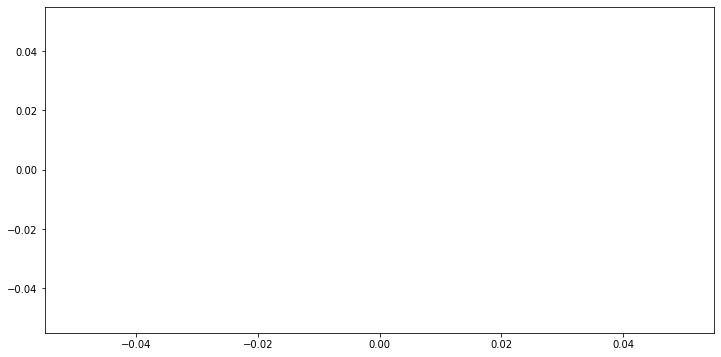

In [28]:
df.plot.line(figsize=(12,6))

In [29]:
test(model,X_test,y_test)

0.0

In [30]:
test(model,X_train,y_train)

0.0

In [31]:
preds

tensor([[-0.0423,  0.0519,  0.0244,  ..., -0.0403, -0.0415, -0.0711],
        [-0.0423,  0.0519,  0.0245,  ..., -0.0403, -0.0415, -0.0710],
        [-0.0423,  0.0519,  0.0245,  ..., -0.0403, -0.0415, -0.0710],
        ...,
        [-0.0423,  0.0519,  0.0245,  ..., -0.0403, -0.0415, -0.0710],
        [-0.0423,  0.0520,  0.0245,  ..., -0.0403, -0.0415, -0.0710],
        [-0.0423,  0.0519,  0.0245,  ..., -0.0403, -0.0415, -0.0710]],
       device='cuda:0', grad_fn=<AddmmBackward>)

In [32]:
for real,pred in zip(y_batch,preds):
    print(real)
    print(torch.argmax(pred))
    print('\n')

tensor(7, device='cuda:0')
tensor(15, device='cuda:0')


tensor(16, device='cuda:0')
tensor(15, device='cuda:0')


tensor(20, device='cuda:0')
tensor(15, device='cuda:0')


tensor(31, device='cuda:0')
tensor(15, device='cuda:0')


tensor(10, device='cuda:0')
tensor(15, device='cuda:0')


tensor(9, device='cuda:0')
tensor(15, device='cuda:0')


tensor(23, device='cuda:0')
tensor(15, device='cuda:0')


tensor(26, device='cuda:0')
tensor(15, device='cuda:0')


tensor(22, device='cuda:0')
tensor(15, device='cuda:0')


tensor(21, device='cuda:0')
tensor(15, device='cuda:0')


tensor(35, device='cuda:0')
tensor(15, device='cuda:0')


tensor(2, device='cuda:0')
tensor(15, device='cuda:0')


tensor(0, device='cuda:0')
tensor(15, device='cuda:0')


tensor(32, device='cuda:0')
tensor(15, device='cuda:0')


tensor(24, device='cuda:0')
tensor(15, device='cuda:0')


tensor(10, device='cuda:0')
tensor(15, device='cuda:0')


tensor(35, device='cuda:0')
tensor(15, device='cuda:0')


tensor(32, device=